In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print("Statistik Deskriptif : ")
df.describe()

Statistik Deskriptif : 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
nan_info = df.isnull().sum()
nan_columns = nan_info[nan_info > 0 ]

print("Fitur dengan nilai NaN")
print(nan_columns)

Fitur dengan nilai NaN
Series([], dtype: int64)


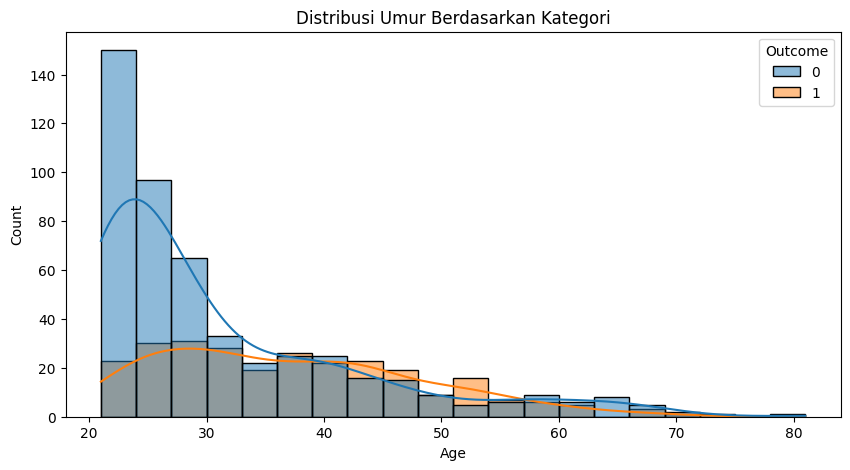

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Age',hue='Outcome',kde=True,bins=20)
plt.title('Distribusi Umur Berdasarkan Kategori')
plt.show()

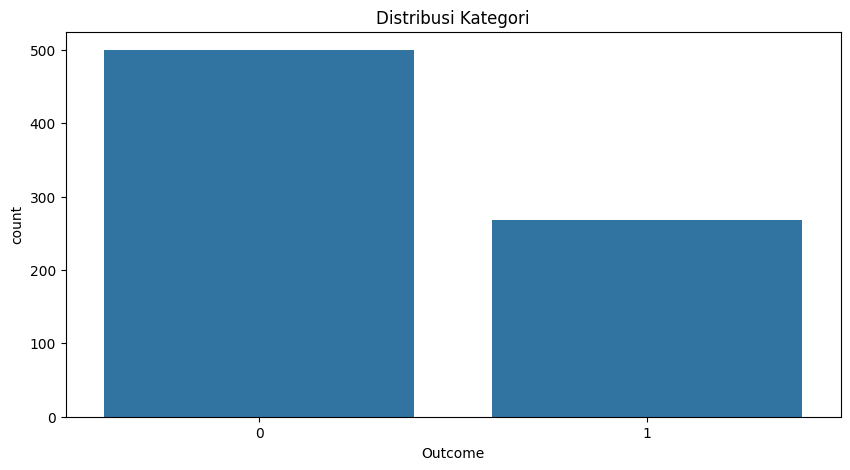

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outcome",data=df)
plt.title("Distribusi Kategori")
plt.show()

In [8]:
label_counts = df['Outcome'].value_counts()
print(label_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
import pickle as pkl

X = df.drop(columns=["Outcome"])
y = df['Outcome']

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X)

normalized_data = pd.DataFrame(X_train_scaled,columns=X.columns)
normalized_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [10]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


ros = RandomOverSampler(random_state=1)
X_resampled,y_resampled = ros.fit_resample(X,y)

resempled_data = pd.DataFrame(X_resampled,columns=X.columns)
resempled_data["Outcome"] = y_resampled
resempled_data.to_csv("balanced_data.csv",index=False)

balanced_data_train = pd.read_csv("balanced_data.csv")
balanced_data_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
995,5,124,74,0,0,34.0,0.220,38,1
996,0,179,90,27,0,44.1,0.686,23,1
997,2,146,70,38,360,28.0,0.337,29,1
998,2,174,88,37,120,44.5,0.646,24,1


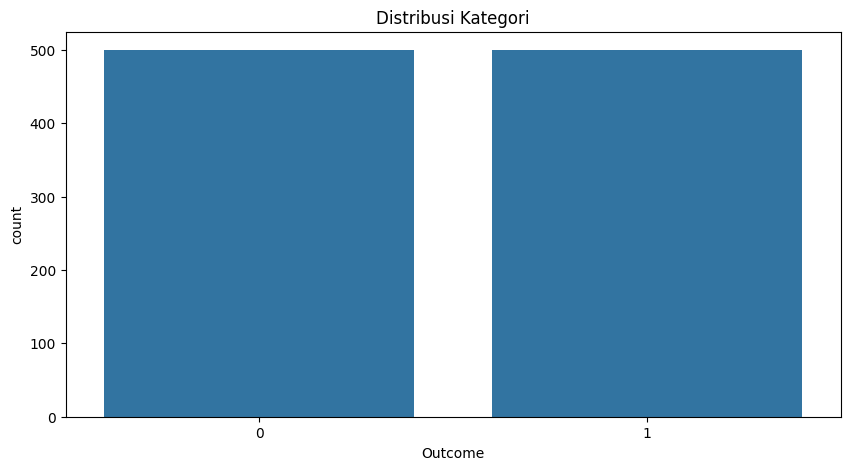

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outcome",data=balanced_data_train)
plt.title("Distribusi Kategori")
plt.show()

In [27]:
X = balanced_data_train.drop(columns=["Outcome"])
y = balanced_data_train['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear',C=1.0,random_state=42,class_weight='balanced')

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Hitung akurasi berdasarkan y_test dan y_pred_svm
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Akurasi SVM: ", svm_accuracy)


Akurasi SVM:  0.74


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print("Akurasi Random Forest: ", rf_accuracy)

Akurasi Random Forest:  0.85


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you already have X_train, y_train, and X_test prepared

# Create a Decision Tree Classifier instance
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy score
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print("Akurasi Decision Tree: ", dt_accuracy)

Akurasi Decision Tree:  0.795


In [31]:
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes
from sklearn.metrics import accuracy_score

# Assuming you already have X_train, y_train, and X_test prepared

# Create a Naive Bayes Classifier instance
nb_model = GaussianNB()  # GaussianNB assumes continuous features

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy score
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Print the accuracy
print("Akurasi Naive Bayes: ", nb_accuracy)

Akurasi Naive Bayes:  0.765


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you already have X_train, y_train, and X_test prepared

# Create a Logistic Regression Classifier instance
lr_model = LogisticRegression(random_state=42)  # Set a random seed for reproducibility

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy score
lr_accuracy = accuracy_score(y_test, y_pred_lr)  # Typo corrected: use y_test for accuracy


# Print the accuracy
print("Akurasi Logistic Regression: ", lr_accuracy)

Akurasi Logistic Regression:  0.745


C:\Users\Muhammad Alivian\anaconda3\envs\PSD\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you already have X_train, y_train, and X_test prepared

# Create a KNN Classifier instance
knn_model = KNeighborsClassifier(n_neighbors=3)  # Set the number of neighbors to 3

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy score
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Print the accuracy
print("Akurasi KNN: ", knn_accuracy)

Akurasi KNN:  0.72
